In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_ca_data.csv")
data_bdcd = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_data.csv")
# scaling = pd.read_csv("/Users/shaozishan/Desktop/krr_data/strong_scaling_cabdcd.csv")
#pd.read_csv("/Users/shaozishan/Desktop/Research/Parallel Machine Learning/outputs/Poly_5_pyrim_cabdcd.csv")

In [5]:
data.head()

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset
0,a9a.txt,linear,16,2,1,5,90000,0.0001,0.00001,0.027141,0.000267,0.000358,3.387000e-07,0.045288,0.000123,2.850000e-08,0.000016
1,a9a.txt,linear,8,2,1,5,90000,0.0001,0.00001,0.032922,0.000309,0.000285,2.748000e-07,0.048633,0.000102,3.260000e-08,0.000012
2,a9a.txt,linear,4,2,1,5,90000,0.0001,0.00001,0.046486,0.000344,0.000301,2.505000e-07,0.062533,0.000098,2.630000e-08,0.000011
3,a9a.txt,linear,2,2,1,5,90000,0.0001,0.00001,0.077276,0.000561,0.000073,3.154000e-07,0.092669,0.000094,2.960000e-08,0.000012
4,a9a.txt,linear,1,2,1,5,90000,0.0001,0.00001,0.128495,0.000995,0.000018,2.465000e-07,0.142681,0.000086,1.710000e-08,0.000009


# print the information of the data

In [3]:
data.info()

data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kernel               78 non-null     object 
 1    num_process         78 non-null     int64  
 2    s                   78 non-null     int64  
 3    blksize             78 non-null     int64  
 4    csr_setup_time      78 non-null     float64
 5    kernel_computation  78 non-null     float64
 6    allreduce_time      78 non-null     float64
 7    sample_time         78 non-null     float64
 8    csr_read_time       78 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 5.6+ KB


,num_process,s,blksize,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time
count,78.00000,78.000000,78.000000,78.000000,78.000000,7.800000e+01,7.800000e+01,78.000000
mean,10.50000,49.923077,21.538462,0.000175,0.000136,2.971709e-05,1.826146e-06,0.000250
std,10.89829,62.140346,17.137861,0.000038,0.000112,3.572655e-05,1.629783e-06,0.000039
min,1.00000,1.000000,10.000000,0.000137,0.000051,2.330000e-07,3.000000e-07,0.000215
25%,2.00000,3.000000,10.000000,0.000147,0.000054,4.332325e-06,5.694500e-07,0.000224
50%,6.00000,3.000000,10.000000,0.000162,0.000064,1.662410e-05,1.499300e-06,0.000232
75%,16.00000,90.000000,30.000000,0.000187,0.000209,4.841615e-05,2.280175e-06,0.000255
max,32.00000,180.000000,60.000000,0.000259,0.000398,1.748355e-04,8.689900e-06,0.000366


In [15]:
df = data[(data[' num_process'] == 8) & (data[' s'] == 3)]

df.iloc[:, 4:].describe()


# df.columns
# df[[' csr_setup_time',
#        ' kernel_computation', ' allreduce_time', ' sample_time',
#        ' csr_read_time']].describe()

,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time
count,6.000000,6.000000,6.000000,6.000000e+00,6.000000
mean,0.000154,0.000221,0.000044,2.072150e-06,0.000229
std,0.000005,0.000110,0.000022,7.752257e-07,0.000006
min,0.000149,0.000068,0.000018,1.037900e-06,0.000224
25%,0.000150,0.000149,0.000029,1.582325e-06,0.000225
50%,0.000152,0.000228,0.000046,2.021900e-06,0.000226
75%,0.000158,0.000299,0.000048,2.605475e-06,0.000231
max,0.000162,0.000357,0.000081,3.115400e-06,0.000240


In [4]:
data[" allreduce_time"]
data[" blksize"].unique()

array([10, 20, 30, 40, 50, 60])

[10 20 30 40 50 60]
     csr_setup_time   kernel_computation   allreduce_time   sample_time   
45         0.322581             0.143672         0.037786      0.002208  \
51         0.294042             0.244532         0.044095      0.002758   
57         0.240549             0.315735         0.076126      0.002935   
63         0.216281             0.370025         0.069455      0.003159   
69         0.217541             0.418944         0.058951      0.003676   
75         0.183275             0.438016         0.099233      0.003821   

     csr_read_time  
45        0.493753  
51        0.414574  
57        0.364656  
63        0.341080  
69        0.300888  
75        0.275655  
          0         1         2         3         4         5
0  0.322581  0.294042  0.240549  0.216281  0.217541  0.183275
1  0.143672  0.244532  0.315735  0.370025  0.418944  0.438016
2  0.037786  0.044095  0.076126  0.069455  0.058951  0.099233
3  0.002208  0.002758  0.002935  0.003159  0.003676  0.0038

/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_16913/1206652443.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df.iloc[:, 4:].sum(axis=1)


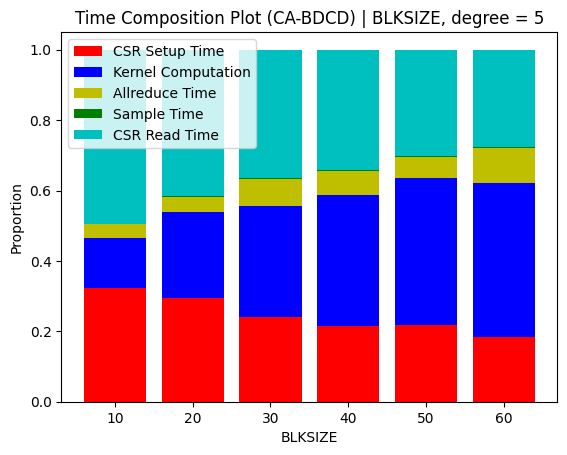

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
df = data[(data[' num_process'] == 8) & (data[' s'] == 3)]

# print(df.head())

print(df[" blksize"].unique())
# print(df)

# find the row sum
df['Total'] = df.iloc[:, 4:].sum(axis=1)
# print(df.head())

# haha = pd.DataFrame()


# df.iteritems()# (col-index, Series) pairs 
# df.iterrows() # (row-index, Series) pairs
# example ... iterating over columns 

# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
# print(bar_data)
# bar_data = np.array(bar_data[:,4:])


# Set the BLKSIZE as the x-axis labels
blksize_labels = df['blksize'].astype(str)


# Set the bar plot data
bar_data = np.array([
    df['csr_setup_time'].tolist(),
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['csr_read_time'].tolist()
])


# print(pd.DataFrame(bar_data).head())

# bar_data = pd.DataFrame(bar_data)



# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(blksize_labels, y1, color='r')
plt.bar(blksize_labels, y2, bottom=y1, color='b')
plt.bar(blksize_labels, y3, bottom=y1+y2, color='y')
plt.bar(blksize_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(blksize_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('BLKSIZE')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | BLKSIZE, degree = 5')
plt.show()


## Stacked Bar Chart

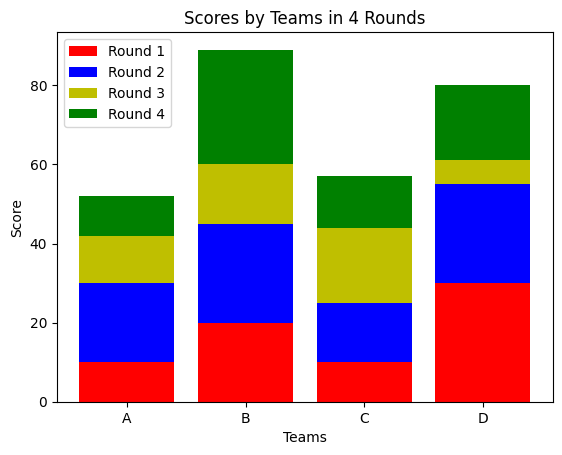

In [ ]:
# create data
x = ['A', 'B', 'C', 'D']
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

## Plot by s

In [9]:
# data
data.columns

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'csr_setup_time',
       'kernel_computation', 'allreduce_time', 'sample_time', 'csr_read_time',
       'gradient_comp_time', 'alpha_update', 'memory_reset', 'major_time',
       'runtime'],
      dtype='object')

   filename   kernel  num_process   s  blksize  degree  max_iter  Gauss_para   
2   a9a.txt   linear            8   2        1       5     65000      0.0001  \
8   a9a.txt   linear            8   4        1       5     65000      0.0001   
14  a9a.txt   linear            8  16        1       5     65000      0.0001   
20  a9a.txt   linear            8   8        1       5     65000      0.0001   

     LAMBDA  csr_setup_time  kernel_computation  allreduce_time   sample_time   
2   0.00001        0.039368            0.000349        0.000382  2.984000e-07  \
8   0.00001        0.036476            0.000169        0.000326  2.137000e-07   
14  0.00001        0.036470            0.000089        0.000311  2.801000e-07   
20  0.00001        0.037583            0.000129        0.000328  3.584000e-07   

    csr_read_time  gradient_comp_time  alpha_update  memory_reset  major_time   
2        0.054269            0.000138  2.960000e-08      0.000016    0.000884  \
8        0.051376            0.

/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_3688/931589934.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df.iloc[:, 4:].sum(axis=1)


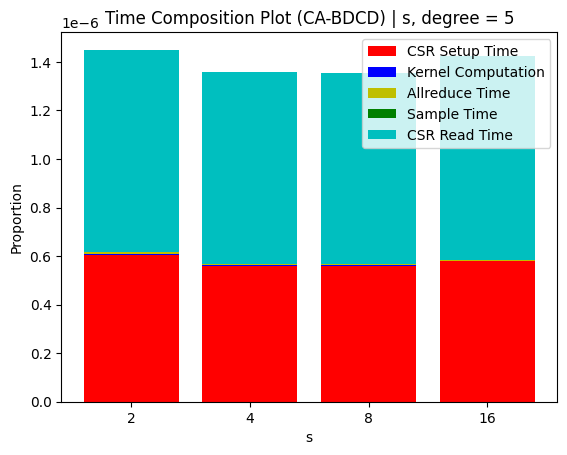

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
df = data[(data['num_process'] == 8) & (data['blksize'] == 1)]

print(df.head())

df['Total'] = df.iloc[:, 4:].sum(axis=1)
# print(df.head())

# haha = pd.DataFrame()


# df.iteritems()# (col-index, Series) pairs 
# df.iterrows() # (row-index, Series) pairs
# example ... iterating over columns 

bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
# print(bar_data)
# bar_data = np.array(bar_data[:,4:])

# Set the BLKSIZE as the x-axis labels
s_labels = df['s'].sort_values().astype(str)


# Set the bar plot data
bar_data = np.array([
    bar_data['csr_setup_time'].tolist(),
    bar_data['kernel_computation'].tolist(),
    bar_data['allreduce_time'].tolist(),
    bar_data['sample_time'].tolist(),
    bar_data['csr_read_time'].tolist()
])

# bar_data = pd.DataFrame(bar_data)



# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(s_labels, y1, color='r')
plt.bar(s_labels, y2, bottom=y1, color='b')
plt.bar(s_labels, y3, bottom=y1+y2, color='y')
plt.bar(s_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(s_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('s')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | s, degree = 5')
plt.show()

## Plot by process

/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_16913/1535146227.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df.iloc[:, 4:].sum(axis=1)


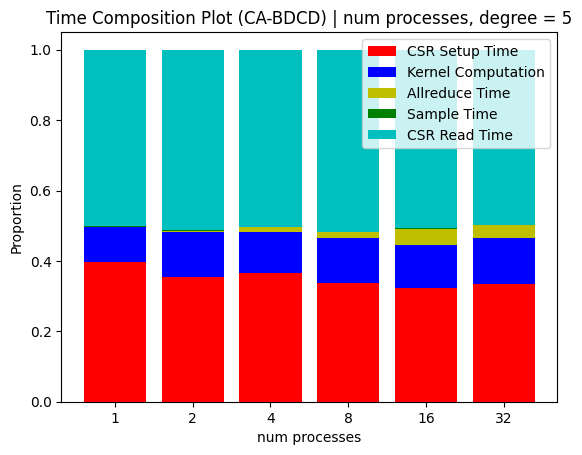

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
df = data[(data[' s'] == 30) & (data[' blksize'] == 10)]


df['Total'] = df.iloc[:, 4:].sum(axis=1)


bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)


# Set the BLKSIZE as the x-axis labels
process_labels = df[' num_process'].sort_values().astype(str)


# Set the bar plot data
bar_data = np.array([
    bar_data[' csr_setup_time'].tolist(),
    bar_data[' kernel_computation'].tolist(),
    bar_data[' allreduce_time'].tolist(),
    bar_data[' sample_time'].tolist(),
    bar_data[' csr_read_time'].tolist()
])


# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(process_labels, y1, color='r')
plt.bar(process_labels, y2, bottom=y1, color='b')
plt.bar(process_labels, y3, bottom=y1+y2, color='y')
plt.bar(process_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('num processes')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | num processes, degree = 5')
plt.show()

# make a graph for the new data

In [19]:
data.columns

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'csr_setup_time',
       'kernel_computation', 'allreduce_time', 'sample_time', 'csr_read_time',
       'gradient_comp_time', 'alpha_update', 'memory_reset'],
      dtype='object')

In [23]:
data

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset
0,a9a.txt,linear,16,2,1,5,90000,0.0001,0.00001,0.027141,0.000267,0.000358,3.387000e-07,0.045288,0.000123,2.850000e-08,0.000016
1,a9a.txt,linear,8,2,1,5,90000,0.0001,0.00001,0.032922,0.000309,0.000285,2.748000e-07,0.048633,0.000102,3.260000e-08,0.000012
2,a9a.txt,linear,4,2,1,5,90000,0.0001,0.00001,0.046486,0.000344,0.000301,2.505000e-07,0.062533,0.000098,2.630000e-08,0.000011
3,a9a.txt,linear,2,2,1,5,90000,0.0001,0.00001,0.077276,0.000561,0.000073,3.154000e-07,0.092669,0.000094,2.960000e-08,0.000012
4,a9a.txt,linear,1,2,1,5,90000,0.0001,0.00001,0.128495,0.000995,0.000018,2.465000e-07,0.142681,0.000086,1.710000e-08,0.000009
5,a9a.txt,linear,16,16,1,5,90000,0.0001,0.00001,0.027447,0.000117,0.000480,3.304000e-07,0.045324,0.000120,1.470000e-08,0.000004
6,a9a.txt,linear,8,16,1,5,90000,0.0001,0.00001,0.033627,0.000101,0.000298,3.212000e-07,0.048599,0.000099,1.280000e-08,0.000003
7,a9a.txt,linear,4,16,1,5,90000,0.0001,0.00001,0.046901,0.000120,0.000215,3.014000e-07,0.063159,0.000097,1.210000e-08,0.000002
8,a9a.txt,linear,2,16,1,5,90000,0.0001,0.00001,0.076753,0.000135,0.000088,2.239000e-07,0.093079,0.000091,1.120000e-08,0.000002
9,a9a.txt,linear,1,16,1,5,90000,0.0001,0.00001,0.128292,0.000250,0.000020,1.362000e-07,0.143222,0.000084,1.080000e-08,0.000001


In [13]:
df = data.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df = df[(df['s'] == 2) & (df['blksize'] == 1)]


df2 = data_bdcd.drop('csr_read_time',axis=1)
df2 = df2.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df2 = df2[(df2['s'] == 0) & (df2['blksize'] == 1)]



In [14]:
df['Total'] = df.iloc[:, 9:].sum(axis=1)
df2['Total'] = df2.iloc[:, 9:].sum(axis=1)

df.head()

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,kernel_computation,allreduce_time,sample_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime,Total
0,a9a.txt,linear,32,2,1,5,65000,0.0001,0.00001,0.000213,0.000587,3.538000e-07,0.000163,3.230000e-08,0.000019,0.000983,63.993692,63.995658
1,a9a.txt,linear,16,2,1,5,65000,0.0001,0.00001,0.000279,0.000384,3.004000e-07,0.000155,3.160000e-08,0.000018,0.000837,54.491827,54.493500
2,a9a.txt,linear,8,2,1,5,65000,0.0001,0.00001,0.000349,0.000382,2.984000e-07,0.000138,2.960000e-08,0.000016,0.000884,57.597826,57.599595
3,a9a.txt,linear,4,2,1,5,65000,0.0001,0.00001,0.000399,0.000375,2.801000e-07,0.000128,2.850000e-08,0.000014,0.000917,59.745101,59.746935
4,a9a.txt,linear,2,2,1,5,65000,0.0001,0.00001,0.000682,0.000077,4.057000e-07,0.000120,2.790000e-08,0.000013,0.000892,58.213643,58.215428


In [15]:
df2.head()
df2.columns

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime', 'Total'],
      dtype='object')

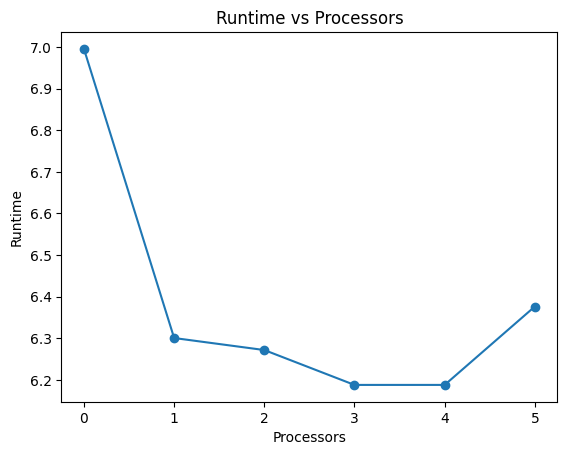

In [20]:
processors = df2.iloc[:,2]  # log-scaled processor, base 2 -> name should be 2,4,8,16 with equal gap between
runtime = df2['Total']

# Apply logarithm base 2 using numpy's log2 function
log_runtime = np.log2(runtime)
log_processors = np.log2(processors)

# Create the line plot
plt.plot(log_processors, log_runtime, marker='o')

# Set the labels and title
plt.xlabel('Processors')
plt.ylabel('Runtime')
plt.title('Runtime vs Processors')

# Display the plot
plt.show()

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset'],
      dtype='object')
  filename   kernel  num_process  s  blksize  degree  max_iter  Gauss_para   
0  a9a.txt   linear           16  2        1       5     90000      0.0001  \
1  a9a.txt   linear            8  2        1       5     90000      0.0001   
2  a9a.txt   linear            4  2        1       5     90000      0.0001   
3  a9a.txt   linear            2  2        1       5     90000      0.0001   
4  a9a.txt   linear            1  2        1       5     90000      0.0001   

    LAMBDA  kernel_computation  allreduce_time   sample_time   
0  0.00001            0.000267        0.000358  3.387000e-07  \
1  0.00001            0.000309        0.000285  2.748000e-07   
2  0.00001            0.000344        0.000301  2.505000e-07   
3  0.00001      

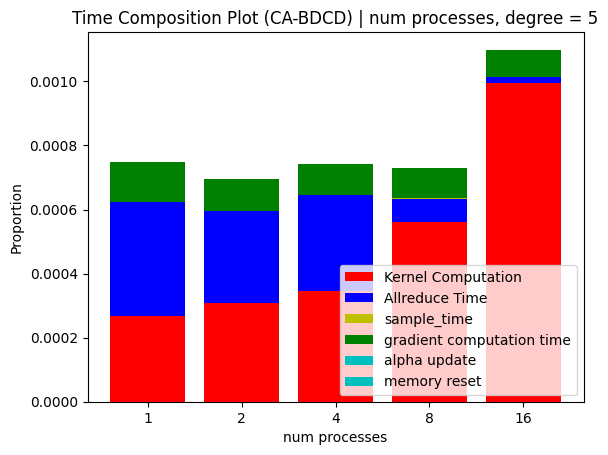

In [58]:
# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df = df[(data['s'] == 2) & (df['blksize'] == 1)]

print(df.columns)
print(df)

# Set the BLKSIZE as the x-axis labels
process_labels = df['num_process'].sort_values().astype(str)


# Set the bar plot data

bar_data = np.array([
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['gradient_comp_time'].tolist(),
    df['alpha_update'].tolist(),
    df['memory_reset'].tolist()
])

'''
bar_data = np.array([
    bar_data[:,9].tolist(),
    bar_data[:,10].tolist(),
    bar_data[:,11].tolist(),
    bar_data[:,12].tolist(),
    bar_data[:,13].tolist(),
    bar_data[:,14].tolist()
])
'''

# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(process_labels, y1, color='r')
plt.bar(process_labels, y2, bottom=y1, color='b')
plt.bar(process_labels, y3, bottom=y1+y2, color='y')
plt.bar(process_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4+y5, color='c')

plt.xlabel('num processes')
plt.ylabel('Proportion')
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | num processes, degree = 5')
plt.show()

In [57]:
bar_data

array([[2.670763e-04, 3.087368e-04, 3.444517e-04, 5.609390e-04,
        9.951662e-04],
       [3.575444e-04, 2.851367e-04, 3.008837e-04, 7.333630e-05,
        1.774760e-05],
       [3.387000e-07, 2.748000e-07, 2.505000e-07, 3.154000e-07,
        2.465000e-07],
       [1.234121e-04, 1.015963e-04, 9.781710e-05, 9.414450e-05,
        8.559390e-05],
       [2.850000e-08, 3.260000e-08, 2.630000e-08, 2.960000e-08,
        1.710000e-08],
       [1.575740e-05, 1.244580e-05, 1.125960e-05, 1.167590e-05,
        9.182700e-06]])

# Line Plot for cabdcd

In [11]:
scaling.columns

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'runtime'],
      dtype='object')

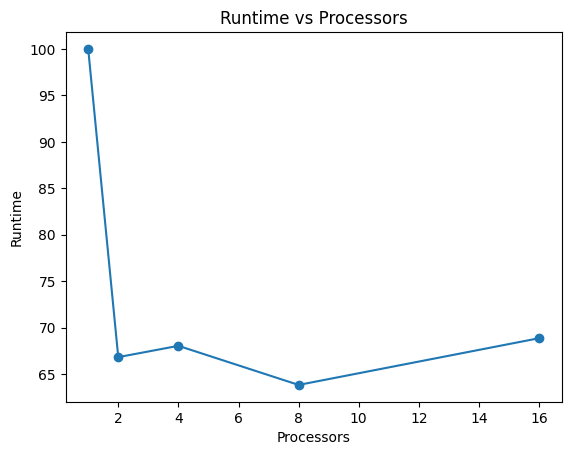

In [18]:
df = scaling[(scaling['s'] == 2) & (scaling['blksize'] == 1)]

processors = df.iloc[:,2]
runtime = df['runtime']

# Create the line plot
plt.plot(processors, runtime, marker='o')

# Set the labels and title
plt.xlabel('Processors')
plt.ylabel('Runtime')
plt.title('Runtime vs Processors')

# Display the plot
plt.show()

# New version of graph

In this case, we apply the newest plot to represent our experiment data

- stack barplot
- represented with trends of total time
- varies by processes and s

In [269]:
data = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_ca_data_a9a.csv")
data_bdcd = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_data_a9a.csv")

## See closer to the data

In [301]:
data[(data['kernel'] == " gauss") & (data['num_process'] == 48)]

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
1,a9a.txt,gauss,48,64,1,5,60000,0.0001,0.00001,0.039006,0.000889,0.001783,9.089000e-07,0.046266,0.000167,1.170000e-08,0.000283,0.003123,187.444996
3,a9a.txt,gauss,48,32,1,5,60000,0.0001,0.00001,0.028985,0.000598,0.002061,1.330100e-06,0.045003,0.000171,1.340000e-08,0.000276,0.003107,186.473508
6,a9a.txt,gauss,48,16,1,5,60000,0.0001,0.00001,0.032343,0.000607,0.001473,2.664800e-06,0.045773,0.000180,1.620000e-08,0.000244,0.002506,150.470699
8,a9a.txt,gauss,48,8,1,5,60000,0.0001,0.00001,0.031994,0.000645,0.001357,5.716800e-06,0.050024,0.000176,1.930000e-08,0.000179,0.002362,141.838450
10,a9a.txt,gauss,48,2,1,5,60000,0.0001,0.00001,0.030477,0.000719,0.001363,4.738300e-06,0.047207,0.000122,2.520000e-08,0.000029,0.002237,134.335213
11,a9a.txt,gauss,48,2,1,5,60000,0.0001,0.00001,0.033948,0.000722,0.001364,4.490700e-06,0.050060,0.000125,2.330000e-08,0.000031,0.002246,134.867391
63,a9a.txt,gauss,48,64,2,5,30000,0.0001,0.00001,0.038728,0.001736,0.003607,1.705500e-06,0.044738,0.000329,1.880000e-08,0.000540,0.006213,186.473664
66,a9a.txt,gauss,48,32,2,5,30000,0.0001,0.00001,0.051280,0.001751,0.003474,2.282300e-06,0.044701,0.000347,2.210000e-08,0.000575,0.006149,184.566605
71,a9a.txt,gauss,48,16,2,5,30000,0.0001,0.00001,0.033517,0.001183,0.004034,2.914400e-06,0.044803,0.000371,2.710000e-08,0.000550,0.006141,184.322681
76,a9a.txt,gauss,48,8,2,5,30000,0.0001,0.00001,0.038524,0.001210,0.002862,6.573800e-06,0.044575,0.000380,2.940000e-08,0.000522,0.004981,149.517450


## a9a dataset

In [211]:
df = data.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)

df['kernel'].unique()

array([' gauss', ' linear'], dtype=object)

### Part 1: varies by num processes

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime'],
      dtype='object')
   filename   kernel  num_process  s  blksize  degree  max_iter  Gauss_para   
10  a9a.txt   linear            1  0        1       5     60000      0.0001  \
9   a9a.txt   linear           12  0        1       5     60000      0.0001   
7   a9a.txt   linear           24  0        1       5     60000      0.0001   
6   a9a.txt   linear           36  0        1       5     60000      0.0001   
8   a9a.txt   linear           48  0        1       5     60000      0.0001   

     LAMBDA  kernel_computation  allreduce_time   sample_time   
10  0.00001            0.001871        0.000012  3.400000e-07  \
9   0.00001            0.000355        0.000620  2.518000e-07   
7   0.00001            0.000485        0.00049

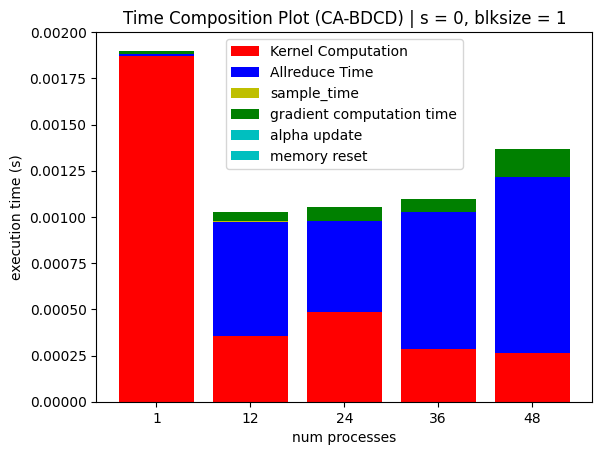

In [290]:
# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data_bdcd.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

# print(df)

df = df[(df['kernel'] == " linear") & (df['s'] == 0) & (df['blksize'] == 1)]
df = df.sort_values('num_process')

print(df.columns)
print(df)

# Set the BLKSIZE as the x-axis labels
process_labels = df['num_process'].sort_values().astype(str)


# Set the bar plot data

bar_data = np.array([
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['gradient_comp_time'].tolist(),
    df['alpha_update'].tolist(),
    df['memory_reset'].tolist()
])

# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(process_labels, y1, color='r')
plt.bar(process_labels, y2, bottom=y1, color='b')
plt.bar(process_labels, y3, bottom=y1+y2, color='y')
plt.bar(process_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4+y5, color='c')

plt.xlabel('num processes')
plt.ylabel('execution time (s)')
plt.ylim(0,0.002)
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | s = 0, blksize = 1')
plt.show()

for bdcd

In [34]:
data_bdcd

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
0,a9a.txt,linear,32,0,1,5,65000,0.0001,0.00001,0.051087,0.000361,0.000837,4.696000e-07,0.051143,0.000048,5.370000e-08,0.000024,0.001270,83.062549
1,a9a.txt,linear,16,0,1,5,65000,0.0001,0.00001,0.046367,0.000508,0.000546,3.644000e-07,0.045503,0.000042,4.560000e-08,0.000019,0.001115,72.890450
2,a9a.txt,linear,8,0,1,5,65000,0.0001,0.00001,0.053195,0.000598,0.000464,3.317000e-07,0.052588,0.000038,3.880000e-08,0.000016,0.001116,72.889078
3,a9a.txt,linear,4,0,1,5,65000,0.0001,0.00001,0.066745,0.000634,0.000498,2.740000e-07,0.063417,0.000035,4.960000e-08,0.000016,0.001183,77.250877
4,a9a.txt,linear,2,0,1,5,65000,0.0001,0.00001,0.097643,0.001108,0.000064,3.222000e-07,0.096016,0.000017,3.250000e-08,0.000018,0.001206,78.813724
5,a9a.txt,linear,1,0,1,5,65000,0.0001,0.00001,0.149537,0.001919,0.000011,2.323000e-07,0.149600,0.000013,3.100000e-08,0.000012,0.001955,127.587317
6,a9a.txt,linear,32,0,2,5,32500,0.0001,0.00001,0.054230,0.000460,0.001149,7.083000e-07,0.050605,0.000087,6.230000e-08,0.000073,0.001771,57.963910
7,a9a.txt,linear,16,0,2,5,32500,0.0001,0.00001,0.046904,0.000507,0.000876,4.344000e-07,0.045440,0.000067,4.990000e-08,0.000046,0.001496,48.891303
8,a9a.txt,linear,8,0,2,5,32500,0.0001,0.00001,0.053007,0.000618,0.000725,4.668000e-07,0.052976,0.000056,4.510000e-08,0.000041,0.001441,47.071374
9,a9a.txt,linear,4,0,2,5,32500,0.0001,0.00001,0.074612,0.000658,0.000770,4.930000e-07,0.063283,0.000053,4.890000e-08,0.000038,0.001520,49.674349


Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime'],
      dtype='object')
  filename  kernel  num_process  s  blksize  degree  max_iter  Gauss_para   
4  a9a.txt   gauss            1  0        1       5     60000      0.0001  \
5  a9a.txt   gauss            1  0        1       5     60000      0.0001   
3  a9a.txt   gauss           12  0        1       5     60000      0.0001   
2  a9a.txt   gauss           24  0        1       5     60000      0.0001   
0  a9a.txt   gauss           36  0        1       5     60000      0.0001   
1  a9a.txt   gauss           48  0        1       5     60000      0.0001   

    LAMBDA  kernel_computation  allreduce_time   sample_time   
4  0.00001            0.018581        0.000018  2.604000e-07  \
5  0.00001            0.018669        0.000019  

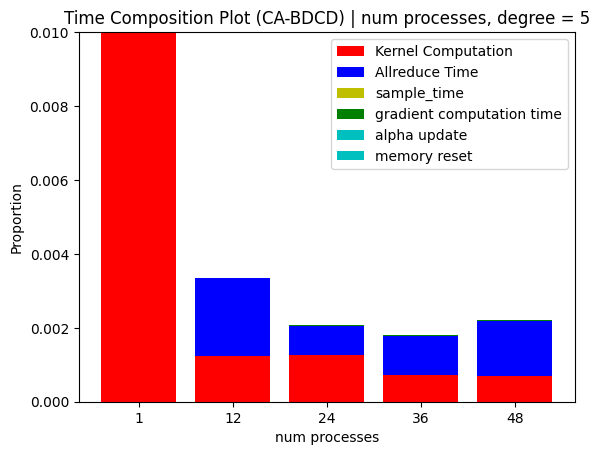

In [244]:
# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data_bdcd.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df = df[(df['blksize'] == 1) & (df['kernel'] == " gauss")]
df = df.sort_values('num_process')

print(df.columns)
print(df)

# Set the BLKSIZE as the x-axis labels
process_labels = df['num_process'].sort_values().astype(str)


# Set the bar plot data

bar_data = np.array([
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['gradient_comp_time'].tolist(),
    df['alpha_update'].tolist(),
    df['memory_reset'].tolist()
])

'''
bar_data = np.array([
    bar_data[:,9].tolist(),
    bar_data[:,10].tolist(),
    bar_data[:,11].tolist(),
    bar_data[:,12].tolist(),
    bar_data[:,13].tolist(),
    bar_data[:,14].tolist()
])
'''

# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(process_labels, y1, color='r')
plt.bar(process_labels, y2, bottom=y1, color='b')
plt.bar(process_labels, y3, bottom=y1+y2, color='y')
plt.bar(process_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4+y5, color='c')

plt.xlabel('num processes')
plt.ylabel('Proportion')
plt.ylim(0,0.01)
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | num processes, degree = 5')
plt.show()

# Varies by s

In [296]:
df = data_bdcd.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)

df = df[(df['blksize'] == 4)  & (df['num_process'] == 1) & (df['kernel'] == " linear")]

print(df)

   filename   kernel  num_process  s  blksize  degree  max_iter  Gauss_para   
30  a9a.txt   linear            1  0        4       5     15000      0.0001  \

     LAMBDA  kernel_computation  allreduce_time   sample_time   
30  0.00001            0.002308        0.000078  8.272000e-07  \

    gradient_comp_time  alpha_update  memory_reset  major_time    runtime  
30            0.000051  5.030000e-08      0.000073    0.002511  37.952546  


Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime'],
      dtype='object')
  filename   kernel  num_process   s  blksize  degree  max_iter  Gauss_para   
0  a9a.txt   linear            1   0       32       5      1875      0.0001  \
6  a9a.txt   linear            1   2       32       5      1875      0.0001   
5  a9a.txt   linear            1   4       32       5      1875      0.0001   
4  a9a.txt   linear            1   8       32       5      1875      0.0001   
3  a9a.txt   linear            1  16       32       5      1875      0.0001   
2  a9a.txt   linear            1  32       32       5      1875      0.0001   
1  a9a.txt   linear            1  64       32       5      1875      0.0001   

    LAMBDA  kernel_computation  allreduce_time  sample_time   
0  0.00001          

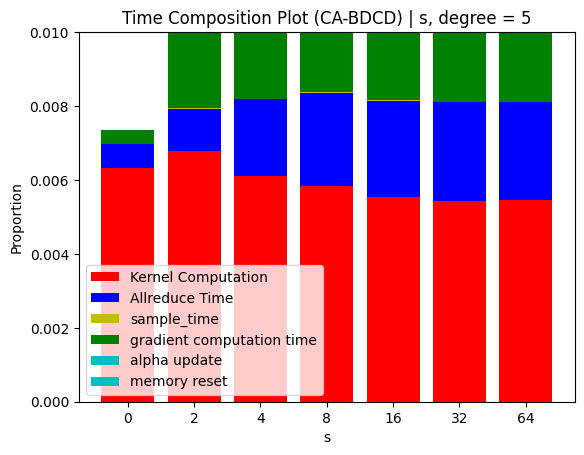

In [295]:
# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data_bdcd.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)

# df2 is the cabdcd
df2 = data.drop('csr_read_time',axis=1)
df2 = df2.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df = df[(df['blksize'] == 32)  & (df['num_process'] == 1) & (df['kernel'] == " linear")]
# df = df.sort_values('s')

df2 = df2[(df2['blksize'] == 32) & (df2['num_process'] == 1) & (df2['kernel'] == " linear")]

df2 = pd.concat([df, df2], ignore_index=True)

df2 = df2.sort_values('s')

print(df.columns)
print(df2)

# Set the BLKSIZE as the x-axis labels
s_labels = df2['s'].sort_values().astype(str)


# Set the bar plot data

bar_data = np.array([
    df2['kernel_computation'].tolist(),
    df2['allreduce_time'].tolist(),
    df2['sample_time'].tolist(),
    df2['gradient_comp_time'].tolist(),
    df2['alpha_update'].tolist(),
    df2['memory_reset'].tolist()
])


# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(s_labels, y1, color='r')
plt.bar(s_labels, y2, bottom=y1, color='b')
plt.bar(s_labels, y3, bottom=y1+y2, color='y')
plt.bar(s_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(s_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(s_labels, y5, bottom=y1+y2+y3+y4+y5, color='c')

plt.xlabel('s')
plt.ylabel('Proportion')
plt.ylim(0,0.01)
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | s, degree = 5')
plt.show()

## MNIST datset

In [127]:
data = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_ca_data.csv")
data_bdcd = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_data.csv")

In [177]:
data['s'].unique()
data_bdcd['blksize'].unique()

array([ 1,  2,  8,  4,  3, 12,  6, 48])

### Part 1: varies by number of process

In [106]:
# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df = df[(data['s'] == 3) & (df['blksize'] == 3) & (df['filename'] == "mnist.scale")]
df = df.sort_values('num_process')

print(df.columns)
print(df)

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime'],
      dtype='object')
       filename   kernel  num_process  s  blksize  degree  max_iter   
29  mnist.scale   linear            1  3        3       2     20000  \
28  mnist.scale   linear            2  3        3       2     20000   
27  mnist.scale   linear            4  3        3       2     20000   
26  mnist.scale   linear            8  3        3       2     20000   
25  mnist.scale   linear           16  3        3       2     20000   
24  mnist.scale   linear           32  3        3       2     20000   

    Gauss_para    LAMBDA  kernel_computation  allreduce_time   sample_time   
29      0.0001  0.000005        4.808604e-02        0.000365  3.555900e-06  \
28      0.0001  0.000005        2.203462e-02        0.003090  

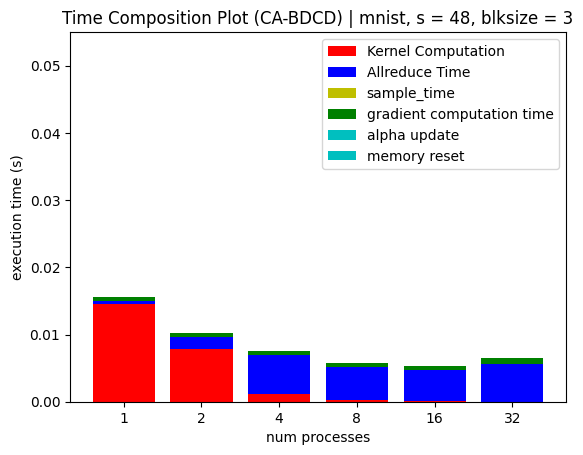

In [122]:
df = data.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)

df = df[(data['s'] == 48) & (df['blksize'] == 3) & (df['filename'] == "mnist.scale")]
df = df.sort_values('num_process')

# Set the BLKSIZE as the x-axis labels
process_labels = df['num_process'].sort_values().astype(str)


# Set the bar plot data

bar_data = np.array([
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['gradient_comp_time'].tolist(),
    df['alpha_update'].tolist(),
    df['memory_reset'].tolist()
])


# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
y6 = bar_data[5]
 
# plot bars in stack manner
plt.bar(process_labels, y1, color='r')
plt.bar(process_labels, y2, bottom=y1, color='b')
plt.bar(process_labels, y3, bottom=y1+y2, color='y')
plt.bar(process_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(process_labels, y6, bottom=y1+y2+y3+y4+y5, color='c')

plt.xlabel('num processes')
plt.ylabel('execution time (s)')
plt.ylim(0,0.055)
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | mnist, s = 48, blksize = 3')

filename = 'mnist'
blksize = 3
s = 48

import os

figname = f"cabdcd-np-{filename}-b{blksize}-s{s}.png"
directory = "/Users/shaozishan/Desktop/krr_data/experiment/mnist-linear"
full_path = os.path.join(directory, figname)

plt.savefig(full_path)

plt.show()


## Part 2: varies by s

In [139]:
data = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_ca_data.csv")
data_bdcd = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_data.csv")

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime'],
      dtype='object')
[ 0  3  6 12 24 48]
      filename   kernel  num_process   s  blksize  degree  max_iter   
0  mnist.scale   linear            8   0        3       2     20000  \
1  mnist.scale   linear            8   3        3       2     20000   
2  mnist.scale   linear            8   6        3       2     20000   
3  mnist.scale   linear            8  12        3       2     20000   
4  mnist.scale   linear            8  24        3       2     20000   
6  mnist.scale   linear            8  24        3       2     20000   
5  mnist.scale   linear            8  48        3       2     20000   

   Gauss_para    LAMBDA  kernel_computation  allreduce_time   sample_time   
0      0.0001  0.000005            0.000177       

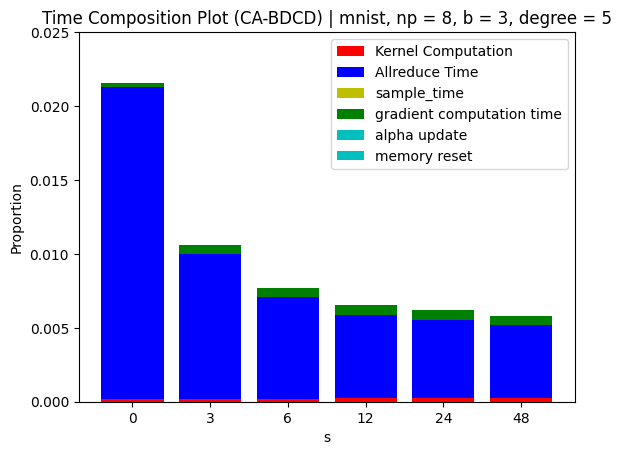

In [178]:
import numpy as np

# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data_bdcd.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)

# df2 is the cabdcd
df2 = data.drop('csr_read_time',axis=1)
df2 = df2.drop('csr_setup_time',axis=1)
# df = df.drop('gradient_comp_time',axis=1)

df = df[(df['filename'] == 'mnist.scale') & (df['blksize'] == 3)  & (df['num_process'] == 8)]
# print(df)
# df = df.sort_values('s')

df2 = df2[(df2['blksize'] == 3) & (df2['num_process'] == 8) & (df2['filename'] == 'mnist.scale')]



df2 = pd.concat([df, df2], ignore_index=True)

df2 = df2.sort_values('s')

print(df.columns)
print(df2['s'].unique())
print(df2)

# Set the BLKSIZE as the x-axis labels
s_labels = df2['s'].sort_values().astype(str)


bar_data = []

# Set the bar plot data
bar_data = np.array([
    df2['kernel_computation'].tolist(),
    df2['allreduce_time'].tolist(),
    df2['sample_time'].tolist(),
    df2['gradient_comp_time'].tolist(),
    df2['alpha_update'].tolist(),
    df2['memory_reset'].tolist()
])


# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(s_labels, y1, color='r')
plt.bar(s_labels, y2, bottom=y1, color='b')
plt.bar(s_labels, y3, bottom=y1+y2, color='y')
plt.bar(s_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(s_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(s_labels, y5, bottom=y1+y2+y3+y4+y5, color='c')


plt.xlabel('s')
plt.ylabel('Proportion')
plt.ylim(0,0.025)
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | mnist, np = 8, b = 3, degree = 5')

filename = 'mnist'
blksize = 3
npro = 8

import os

figname = f"s-{filename}-b{blksize}-np{npro}-zoomin.png"
directory = "/Users/shaozishan/Desktop/krr_data/experiment/mnist-linear"
full_path = os.path.join(directory, figname)

plt.savefig(full_path)


plt.show()

## Part 3: varies by blksize

In [175]:
data = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_ca_data.csv")
data_bdcd = pd.read_csv("/Users/shaozishan/Desktop/krr_data/para_data.csv")

Index(['filename', 'kernel', 'num_process', 's', 'blksize', 'degree',
       'max_iter', 'Gauss_para', 'LAMBDA', 'kernel_computation',
       'allreduce_time', 'sample_time', 'gradient_comp_time', 'alpha_update',
       'memory_reset', 'major_time', 'runtime'],
      dtype='object')
       filename   kernel  num_process  s  blksize  degree  max_iter   
26  mnist.scale   linear            8  0        3       2     20000  \
38  mnist.scale   linear            8  0        6       2     10000   
32  mnist.scale   linear            8  0       12       2      5000   
44  mnist.scale   linear            8  0       48       2      1250   

    Gauss_para    LAMBDA  kernel_computation  allreduce_time  sample_time   
26      0.0001  0.000005            0.000177        0.021139     0.000001  \
38      0.0001  0.000005            0.000395        0.025780     0.000002   
32      0.0001  0.000005            0.000838        0.033121     0.000002   
44      0.0001  0.000005            0.003682        

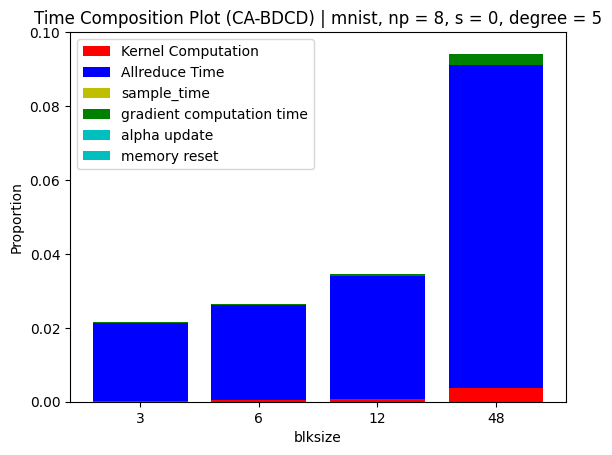

In [191]:
import numpy as np

# bar_data = df.iloc[:, 4:-1].div(df['Total'], axis=0)
df = data_bdcd.drop('csr_read_time',axis=1)
df = df.drop('csr_setup_time',axis=1)


df = df[(df['filename'] == 'mnist.scale') & (df['num_process'] == 8)]
# print(df)
# df = df.sort_values('s')

df = df.sort_values('blksize')

print(df.columns)
print(df)

# Set the BLKSIZE as the x-axis labels
b_labels = df['blksize'].sort_values().astype(str)


bar_data = []

# Set the bar plot data
bar_data = np.array([
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['gradient_comp_time'].tolist(),
    df['alpha_update'].tolist(),
    df['memory_reset'].tolist()
])


# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(b_labels, y1, color='r')
plt.bar(b_labels, y2, bottom=y1, color='b')
plt.bar(b_labels, y3, bottom=y1+y2, color='y')
plt.bar(b_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(b_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(b_labels, y5, bottom=y1+y2+y3+y4+y5, color='c')


plt.xlabel('blksize')
plt.ylabel('Proportion')
plt.ylim(0,0.10)
plt.legend(['Kernel Computation', 'Allreduce Time', 'sample_time', 'gradient computation time', 'alpha update', 'memory reset'])
plt.title('Time Composition Plot (CA-BDCD) | mnist, np = 8, s = 0, degree = 5')

filename = 'mnist'
s = 0
npro = 8

import os

figname = f"b-{filename}-s{s}-np{npro}-zoomin.png"
directory = "/Users/shaozishan/Desktop/krr_data/experiment/mnist-linear"
full_path = os.path.join(directory, figname)

plt.savefig(full_path)


plt.show()